# GA & PSO Comparison

In [ ]:
# --- Import Required Libraries ---
import os, sys
import pandas as pd

# --- Set Up Paths ---
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_PATH not in sys.path:
    sys.path.insert(0, ROOT_PATH)

# --- Import Custom Libraries ---
from pop.util.print_results import (box_plot, bar_plot, scatter_plot, plot_best_configs_across_correlation)
from pop.util.compare_results import perform_statistical_tests

## Algorithm Comparison


Correlation Level: NONE

Sharpe Ratio (best) - Statistical Tests
GA Mean: 1.1656, PSO Mean: 1.2805
Wilcoxon Test: Statistic=4.0000, P-Value=0.0000
Difference is statistically significant.
Paired t-Test: Statistic=-10.7837, P-Value=0.0000
Difference is statistically significant.

Annual Return (best) - Statistical Tests
GA Mean: 38221.1292, PSO Mean: 37555.2954
Wilcoxon Test: Statistic=199.0000, P-Value=0.3468
Difference is NOT statistically significant.
Paired t-Test: Statistic=1.7181, P-Value=0.0961
Difference is NOT statistically significant.

Execution Time (best) - Statistical Tests
GA Mean: 3.0185, PSO Mean: 5.3788
Wilcoxon Test: Statistic=0.0000, P-Value=0.0000
Difference is statistically significant.
Paired t-Test: Statistic=-64.8868, P-Value=0.0000
Difference is statistically significant.

Sharpe Ratio (median) - Statistical Tests
GA Mean: 0.8780, PSO Mean: 1.2805
Wilcoxon Test: Statistic=0.0000, P-Value=0.0000
Difference is statistically significant.
Paired t-Test: Statistic=

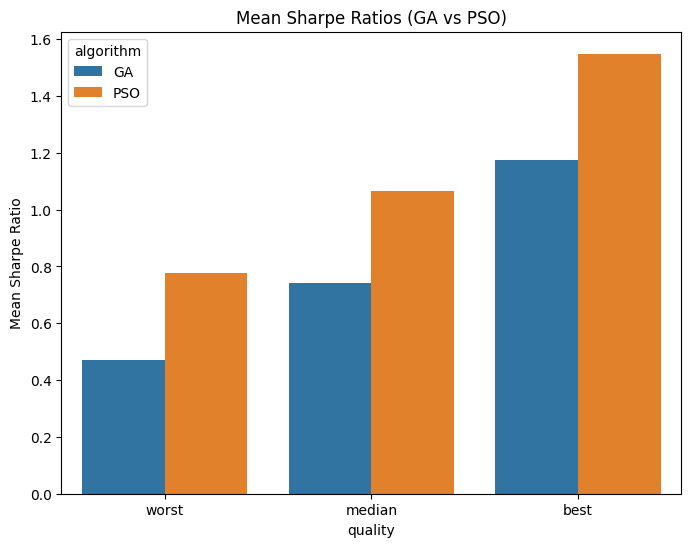

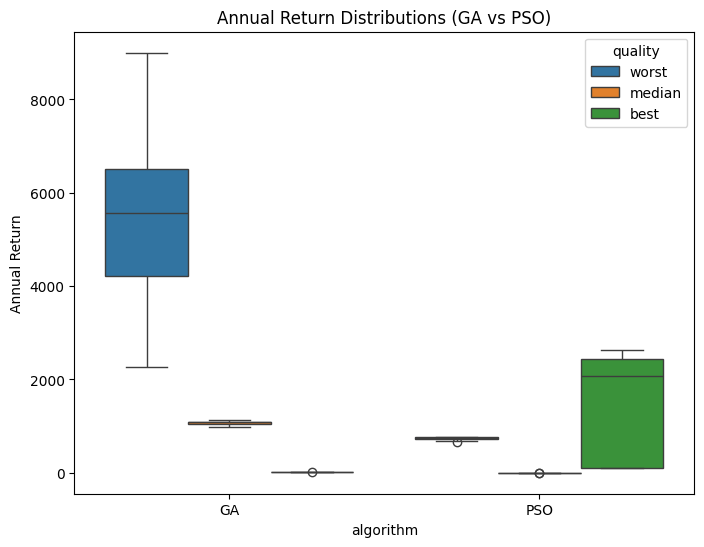

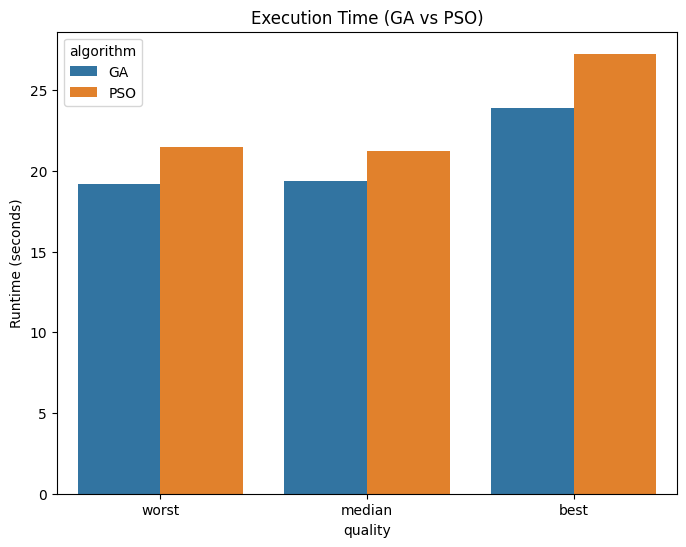

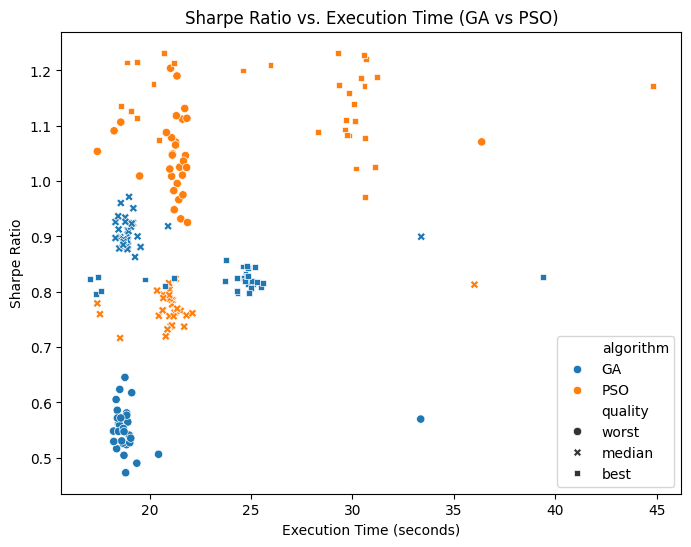

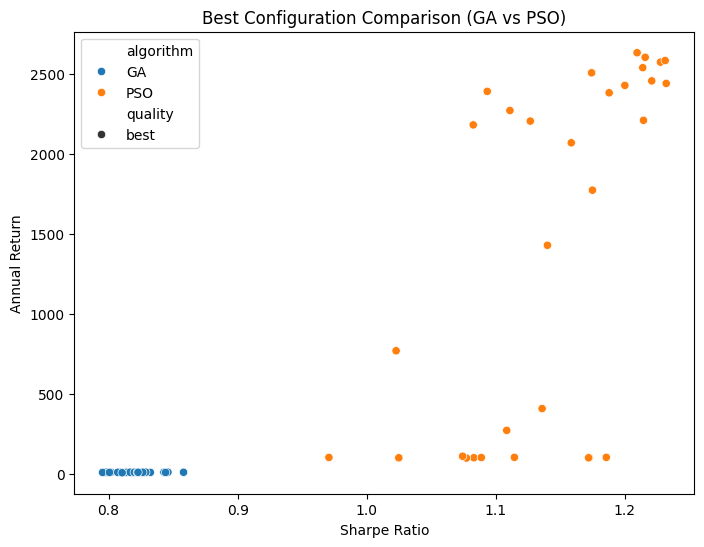

✅ All statistical tests and visualizations completed.


In [2]:
# Define correlation levels and their corresponding file paths
correlation_levels = {
    "none": os.path.join(ROOT_PATH, "experiments", "results", "none_correlation", "final_fine_tuning_results.csv"),
    "low": os.path.join(ROOT_PATH, "experiments", "results", "low_correlation", "final_fine_tuning_results.csv"),
    "medium": os.path.join(ROOT_PATH, "experiments", "results", "medium_correlation", "final_fine_tuning_results.csv"),
    "high": os.path.join(ROOT_PATH, "experiments", "results", "high_correlation", "final_fine_tuning_results.csv"),
}

# Set the alpha value for statistical tests
alpha = 0.05

# Loop through each correlation level
for corr_level, file_path in correlation_levels.items():
    print(f"\n{'='*20}\nCorrelation Level: {corr_level.upper()}\n{'='*20}")
    data = pd.read_csv(file_path)
    for quality in ["best", "median", "worst"]:
        ga_data = data[(data["algorithm"] == "GA") & (data["quality"] == quality)]
        pso_data = data[(data["algorithm"] == "PSO") & (data["quality"] == quality)]
        perform_statistical_tests(ga_data, pso_data, "sharpe_ratio", f"Sharpe Ratio ({quality})", alpha)
        perform_statistical_tests(ga_data, pso_data, "annual_return", f"Annual Return ({quality})", alpha)
        perform_statistical_tests(ga_data, pso_data, "runtime", f"Execution Time ({quality})", alpha)

# Visualization: Sharpe Ratio Comparison (Best, Median, Worst)
bar_plot(data, "mean_sharpe", "Mean Sharpe Ratios (GA vs PSO)", "Mean Sharpe Ratio")

# Visualization: Return Distribution (Best, Median, Worst)
box_plot(data, "annual_return", "Annual Return Distributions (GA vs PSO)", "Annual Return")

# Visualization: Execution Time Comparison (Best, Median, Worst)
bar_plot(data, "runtime", "Execution Time (GA vs PSO)", "Runtime (seconds)")

# Visualization: Tradeoff Analysis (Sharpe Ratio vs. Time)
scatter_plot(data, "runtime", "sharpe_ratio", "Sharpe Ratio vs. Execution Time (GA vs PSO)", "Execution Time (seconds)", "Sharpe Ratio")

# Best Configuration Comparison (Sharpe Ratio vs Annual Return)
best_data = data[data["quality"] == "best"]
scatter_plot(best_data, "sharpe_ratio", "annual_return", "Best Configuration Comparison (GA vs PSO)", "Sharpe Ratio", "Annual Return")

print("✅ All statistical tests and visualizations completed.")

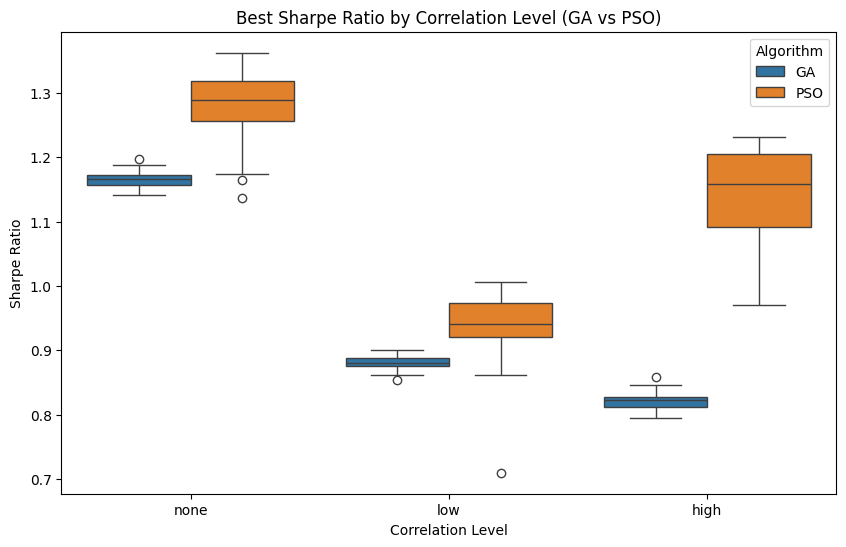

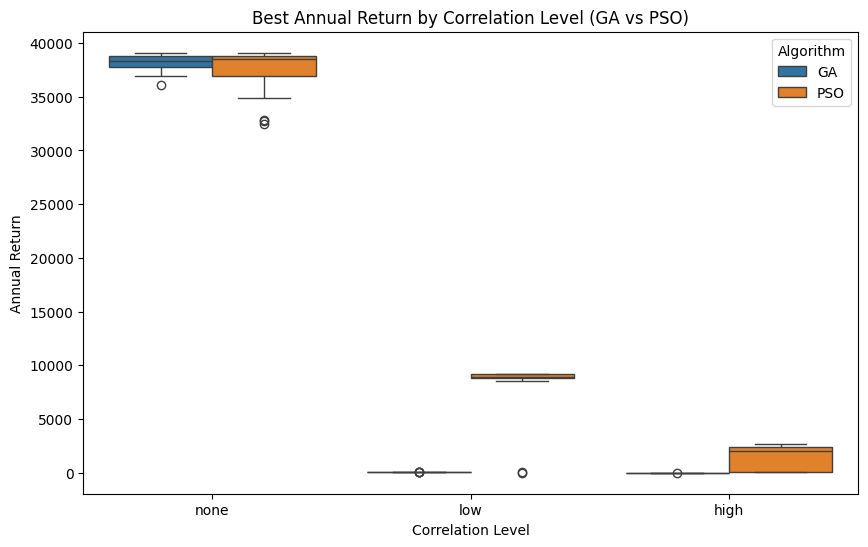

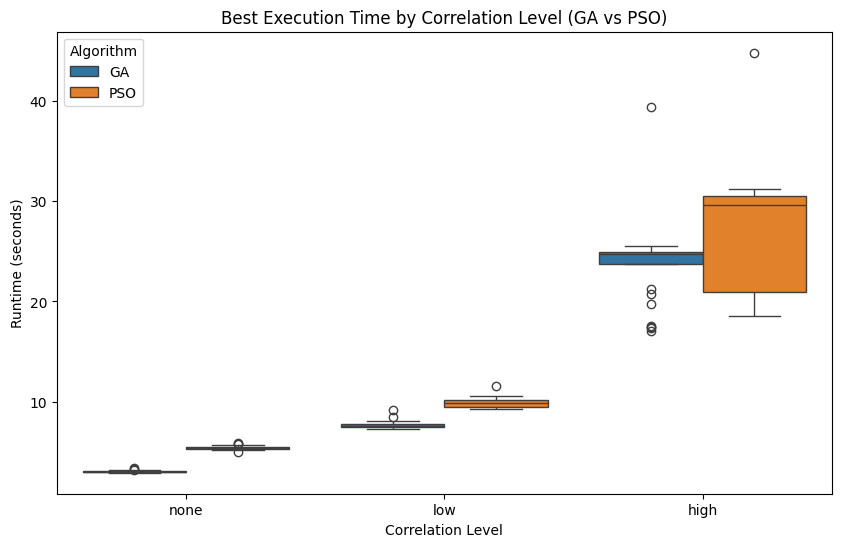

In [3]:
# Plot best configurations across correlation levels
plot_best_configs_across_correlation(correlation_levels)